In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv("Car_sales.csv")
df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [4]:
# Duplicates: 
df_cleaned = df.drop_duplicates() # drop the row which containing duplicates
df_cleaned.shape

(157, 15)

In [5]:
# Summary :
print(df.describe())

       Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


In [6]:
#counting null values according to the column
df.isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

In [7]:
df.isnull().sum().idxmax() # getting the maximum null col

'Manufacturer'

In [8]:
# filling the null values 
df['Sales in thousands'] = df['Sales in thousands'].fillna(df['Sales in thousands'].mean())

max_null_idx = df.isnull().sum().idxmax()
max_null_idx

'Manufacturer'

In [9]:
# finding the minimum and maxum of the dataframe and printing that row also
def min_max_calc(col_name):
  display("the min row is: ",df[df[col_name] == df[col_name].min()])
  return [df[col_name].min(),df[col_name].max()]
min_max_calc('Sales in thousands')
# df

'the min row is: '

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
83,Mitsubishi,3000GT,0.11,20.94,Passenger,25.45,3,161,97.2,72.4,180.3,3.131,19.8,21,29-Jun-14


[np.float64(0.11), np.float64(540.561)]

In [10]:
def find_min_max(df, column_name): 
  min_value = df[column_name].min() 
  max_value = df[column_name].max() 
  # Find the rows with the min and max values 
  min_row = df[df[column_name] == min_value] 
  max_row = df[df[column_name] == max_value]
  return min_value, max_value, min_row, max_row

# Now call the function to find min and max for Horsepower 
hp_min, hp_max, hp_min_row, hp_max_row = find_min_max(df, "Horsepower")
display("Horsepower - Min:", hp_min, "\n", hp_min_row) 
display("Horsepower - Max:", hp_max, "\n", hp_max_row)

'Horsepower - Min:'

'.'

'\n'

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
33,Chrysler,Town & Country,53.48,19.54,Car,.,.,.,.,.,.,.,.,.,13-Jul-15


'Horsepower - Max:'

'92'

'\n'

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
62,Hyundai,Accent,41.184,5.86,Passenger,9.699,1.5,92,96.1,65.7,166.7,2.24,11.9,31,9-Oct-14


### Probability density distribution of continuous numerical variable-length

from scipy.stats import gaussian_kde 

In [11]:
from scipy.stats import gaussian_kde
import seaborn as sns

(157, 15)

'\nKey Differences\n--------------------------------------------------------------------------------------------------------\nFeature\t         |      sns.countplot()\t                    |    sns.histplot()\n--------------------------------------------------------------------------------------------------------\nData Type\t     |    Categorical (e.g., Car Brands)\t    |  Continuous (e.g., Heights, Weights)\nBins\t         |     ❌ No Bins\t                      |  ✅ Uses bins\nKDE Support\t     |     ❌ No\t                              | ✅ Yes (kde=True)\nExample Usage\t |     Counting car brands, colors, cities\t|  Analyzing age, salary, length, etc\n--------------------------------------------------------------------------------------------------------\n'

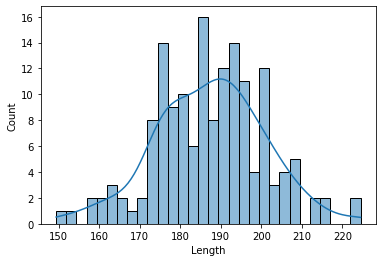

In [12]:
df.columns = df.columns.str.strip()
# above is noting but converting all to the columns
if "Length" in df.columns:
    df["Length"] = pd.to_numeric(df["Length"],errors="coerce") #consver the object to the numbers and the "coerce" convers invalid to null
    data = df["Length"].dropna()
    kde = gaussian_kde(data)
    density_values = kde.evaluate(data)
    result = pd.DataFrame({'Length': data, 'Density': density_values})
    sns.histplot(result["Length"],bins=30,kde=True)
    display(df.shape)
else: 
    print("Error: 'Length' column not found in the dataset.")


# sns.countplot() - For Categorical Data
# sns.histplot() - For Continuous Data



'''
Key Differences
--------------------------------------------------------------------------------------------------------
Feature	         |      sns.countplot()	                    |    sns.histplot()
--------------------------------------------------------------------------------------------------------
Data Type	     |    Categorical (e.g., Car Brands)	    |  Continuous (e.g., Heights, Weights)
Bins	         |     ❌ No Bins	                      |  ✅ Uses bins
KDE Support	     |     ❌ No	                              | ✅ Yes (kde=True)
Example Usage	 |     Counting car brands, colors, cities	|  Analyzing age, salary, length, etc
--------------------------------------------------------------------------------------------------------
'''



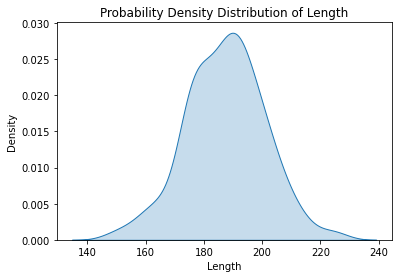

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(result["Length"], fill=True)  # KDE plot for continuous data
plt.title("Probability Density Distribution of Length")
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

In [14]:
# Count by category –group by manufacture
#  you can use the groupby()  function in pandas along with size() or count().

# manufacturer_counts =  df.groupby('Manufacturer').size().reset_index(name='Count')
# manufacturer_counts

df.groupby('Manufacturer').size().reset_index(name='Count')

,Manufacturer,Count
0,Acura,4
1,Audi,3
2,BMW,3
3,Buick,4
4,Cadillac,5
5,Chevrolet,9
6,Chrysler,7
7,Dodge,11
8,Ford,11
9,Honda,5


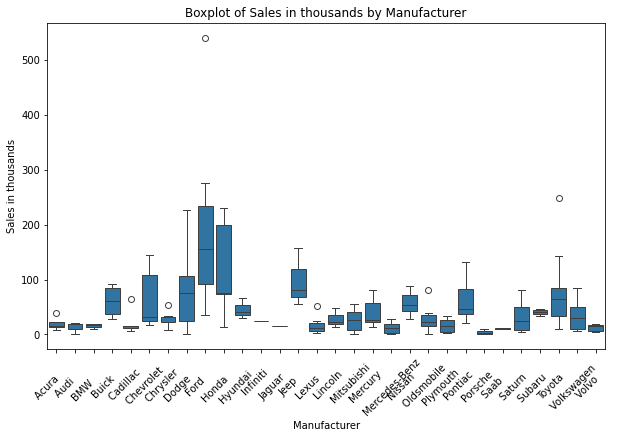

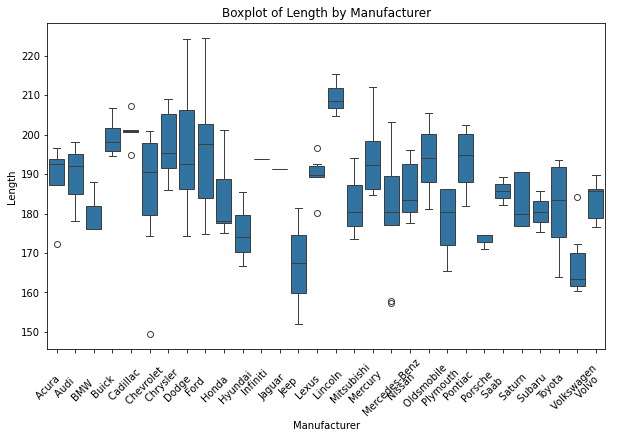

In [15]:
# above code nicely from the non sir pdf
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


df.columns = df.columns.str.strip()

numerical_columns = df.select_dtypes(include=['number']).columns 
numerical_columns = [col for col in numerical_columns if col != 'Manufacturer']

if 'Manufacturer' in df.columns: 
# Create boxplots for each numerical column with respect to 'Manufacturer' 
  for col in numerical_columns:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x='Manufacturer', y=col, data=df) 
    # sns.boxplot(y=col, data=df) # this is wrong
    plt.title(f'Boxplot of {col} by Manufacturer') 
    plt.xlabel('Manufacturer')  
    plt.ylabel(col) 
    plt.xticks(rotation=45)    #since namse are clmsy
    plt.show() 
else: 
  print("Error: 'Manufacturer' column not found in the dataset.")

In [16]:
# Divide the data
# Display column names
print("Column names in the dataset:")  
print("---------------------------")  
print(df.columns)  

# Identify the sales-related column
sales_column = [col for col in df.columns if 'sales' in col.lower()]  

# Raise an error if no sales column is found
if not sales_column:  
    raise KeyError("No column related to 'sales' found in the dataset. Please check the column names.")

# Select the first matching sales column
sales_column_name = sales_column[0]  
print(f"Using column '{sales_column_name}' as the sales column.")  

# Separate the target variable (y) and input features (X)
y = df[sales_column_name]  
X = df.drop(columns=[sales_column_name])  

# Display dataset shapes
print("\nShape of X (input):", X.shape)  
print("Shape of y (output):", y.shape)  

# Show sample data
print("\nInput (X):")  
print(X.head())  

print("\nOutput (y):")  
display(y.head()) 

Column names in the dataset:
---------------------------
Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
Using column 'Sales in thousands' as the sales column.

Shape of X (input): (157, 14)
Shape of y (output): (157,)

Input (X):
    Manufacturer              Model 4-year resale value Vehicle type  \
0  Acura          Integra                         16.36    Passenger   
1  Acura          TL                             19.875    Passenger   
2  Acura          CL                             18.225    Passenger   
3  Acura          RL                             29.725    Passenger   
4  Audi           A4                             22.255    Passenger   

  Price in thousands Engine size Horsepower Wheelbase Width  Length  \
0               21.5     

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales in thousands, dtype: float64

### What is Label Encoding? 
Label Encoding is a method used to convert categorical (text) data 
into numerical form. It assigns a unique integer to each category in a 
column. 

In [17]:
import pandas as pd  
from sklearn.preprocessing import LabelEncoder  

# Load dataset (Make sure 'df' is already defined)
# df = pd.read_csv('car_sales.csv')  # Uncomment if needed

# Identify the column related to 'sales' (case insensitive)
sales_column = [col for col in df.columns if 'sales' in col.lower()]  

# If no sales column is found, raise an error
if not sales_column:  
    raise KeyError("No column related to 'sales' found in the dataset. Please check the column names.")  

# Select the first matching sales column
sales_column_name = sales_column[0]  
print(f"Using column '{sales_column_name}' as the sales column.")  

# Separate the target variable (y) and input features (X)
y = df[sales_column_name]  
X = df.drop(columns=[sales_column_name])  

# Identify categorical columns (object or category type)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns  

# Dictionary to store label encoders for each categorical column
label_encoders = {}  

# Encode categorical variables using LabelEncoder
for col in categorical_columns:  
    le = LabelEncoder()  # Create a LabelEncoder instance
    X[col] = le.fit_transform(X[col])  # Transform the column into numerical values
    label_encoders[col] = le  # Store the encoder for reference  

# Print dataset dimensions after encoding
print("\nShape of X (input features):", X.shape)  
print("Shape of y (target variable):", y.shape)  

# Display first few rows of transformed X and y
print("\nInput (X) with encoded categorical variables:")  
print(X.head())  

print("\nOutput (y):")  
print(y.head())  

# Display the mapping of categorical values to numeric labels
for col in categorical_columns:  
    print(f"\nMapping for {col}:")  
    print(dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))))


Using column 'Sales in thousands' as the sales column.

Shape of X (input features): (157, 14)
Shape of y (target variable): (157,)

Input (X) with encoded categorical variables:
   Manufacturer  Model  4-year resale value  Vehicle type  Price in thousands  \
0             0     79                   53             1                  59   
1             0    143                   70             1                 102   
2             0     25                   63             1                   0   
3             0    115                   87             1                 130   
4             1      8                   78             1                  77   

   Engine size  Horsepower  Wheelbase  Width  Length  Curb weight  \
0            4          17          5      9   172.4           18   
1           16          50         36     32   192.9           91   
2           16          50         29     35   192.0           85   
3           19          44         56     40   196.6      

In [18]:
# why label encodeing is neccesery look this it groups the simialr valued sone as the same 

from sklearn.preprocessing import LabelEncoder

# Sample data
cars = ['Toyota', 'Honda', 'Ford', 'Toyota', 'Ford']

# Create and fit LabelEncoder
le = LabelEncoder()
encoded_cars = le.fit_transform(cars)

# Print encoded values
print("Encoded values:", encoded_cars)

# Decode back to original labels
decoded_cars = le.inverse_transform(encoded_cars) # if i give the tranfrmedd code it will give bach the my code that i have encoded
print("Decoded values:", decoded_cars)


Encoded values: [2 1 0 2 0]
Decoded values: ['Toyota' 'Honda' 'Ford' 'Toyota' 'Ford']


Step-by-Step Explanation with Example

1️⃣ Suppose We Have This Data:
cars = ['Toyota', 'Honda', 'Ford', 'Toyota', 'Ford']
We want to convert these text labels into numbers using LabelEncoder.

2️⃣ Encode the Data




from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  
encoded_cars = le.fit_transform(cars)  

print("Encoded values:", encoded_cars)


Encoded values: [2 1 0 2 0]
This means:

Ford → 0
Honda → 1
Toyota → 2




3️⃣ Understanding the Mapping Code


print(dict(zip(le.classes_, le.transform(le.classes_))))
This pairs each original label with its encoded value:

##### le.classes_ → ['Ford', 'Honda', 'Toyota'] (Sorted alphabetically by default)
##### le.transform(le.classes_) → [0, 1, 2] (Their corresponding numbers)

Output: 



{'Ford': 0, 'Honda': 1, 'Toyota': 2}
This tells us:

Ford → 0
Honda → 1
Toyota → 2
How This Relates to Your Code
Your original code does the same thing but for all categorical columns in X:

for col in categorical_columns:  
    print(f"\nMapping for {col}:")  
    print(dict(zip(label_encoders[col].classes_,  
                   label_encoders[col].transform(label_encoders[col].classes_))))
🔹 It prints the mappings for each categorical column.

In [19]:
# Encode categorical variable vehicle type using one-hot Encoder (used to eccode the catogorical data to the numerical data)
# df = pd.read_csv('Car_sales.csv')
df.columns = df.columns.str.strip() 
print("Available columns:", df.columns)

if 'Vehicle type' in df.columns:
  df = pd.get_dummies(df, columns=['Vehicle type'],prefix='Vehicle', drop_first=True)   # drop_first=True drops one column 
  print(df.isna().sum())

else:
  print("Error: 'Vehicle type' column not found in the dataset.")

Available columns: Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 1
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
Vehicle_Passenger      0
dtype: int64


In [20]:
# Split the Dataset into Train (70%) and Test (10%)

import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('Car_sales.csv')
df.columns = df.columns.str.strip() 

X =  df.drop(columns=['Sales in thousands'])
y = df['Sales in thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random state is to maintain the consistancy in data

print("Training set shape:", X_train.shape, y_train.shape) 
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (109, 14) (109,)
Test set shape: (48, 14) (48,)


In [21]:
# Data visualization with Seaborn Pairplot
# automatically selects numerical columns 
# It creates scatter plots for every pair of numerical columns. 
# It plots histograms (or KDE plots) on the diagonal to show  individual distributions.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df =pd.read_csv('Car_sales.csv')
df.columns = df.columns.str.lower() # ..str.split() also we can se

plt.figure(figsize=(8,3))
# sns.pairplot(df)
# sns.pairplot(df, height=6, aspect=1.5) 
# sns.scatterplot(x=df["manufacturer"], y=df["sales in thousands"])
# plt.xticks(rotation=45)  # Rotates X-axis labels by 45 degrees

# df.head()

# plt.show()


# df.info()

<Figure size 576x216 with 0 Axes>

<Figure size 576x216 with 0 Axes>

In [22]:
# Plot correlation of price and sales using scatterplot 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("car_sales.csv") 
df.columns = df.columns.str.lower()

price_col = next((col for col in df.columns if "price" in col), None) # next says it multiple cols match it took only the frist one and stops
sales_col = next((col for col in df.columns if "sales" in col.lower()),None)

if price_col and sales_col:
  plt.figure(figsize=(8,5))
  sns.scatterplot(x = df[price_col], y = df[sales_col])
  plt.xlabel(price_col.capitalize())
  plt.ylabel(sales_col.capitalize())
  plt.title("Price vs Sales Scatter Plot") 
  plt.xticks(rotation=45) 
  plt.show() 
else:
  print("Error: Could not find 'price' and 'sales' columns.")


FileNotFoundError: [Errno 2] No such file or directory: 'car_sales.csv'

In [ ]:
df.head()

,manufacturer,model,sales in thousands,4-year resale value,vehicle type,price in thousands,engine size,horsepower,wheelbase,width,length,curb weight,fuel capacity,fuel efficiency,latest launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


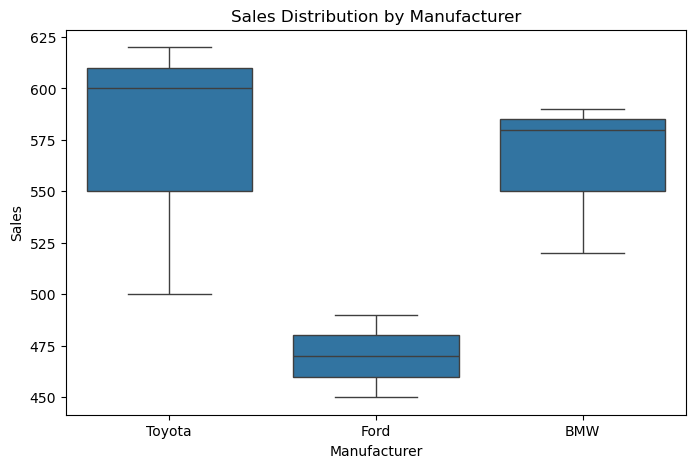

In [ ]:
# Boxplot of sales of different manufacturer
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Sample dataset with 'manufacturer' and 'sales' columns 
data = { 
"manufacturer": ["Toyota", "Ford", "BMW", "Toyota", "Ford", 
"BMW", "Toyota", "Ford", "BMW"], 
"sales": [500, 450, 520, 600, 490, 580, 620, 470, 590] 
} 

# Create DataFrame 
df = pd.DataFrame(data) 
# Create a boxplot of sales by manufacturer 
plt.figure(figsize=(8, 5)) 
sns.boxplot(x=df["manufacturer"], y=df["sales"])

# Customize labels 
plt.xlabel("Manufacturer") 

plt.ylabel("Sales") 
plt.title("Sales Distribution by Manufacturer") 
plt.show()



# grouped_df = df.groupby(by="manufacturer")
# for name, group in grouped_df:
#     print(f"Manufacturer: {name}")
#     print(group, "\n")


## correlation coefficient value of price and sales 

1️⃣ Covariance → Measures the direction of the relationship (positive or negative).

2️⃣ Correlation → Measures both direction and strength on a standardized scale.

🔹 In Pandas

df.cov()  # Covariance matrix


df.corr() # Correlation matrix





## 📌 Covariance Formula
\[
\text{Cov}(X, Y) = \frac{\sum (X_i - \bar{X}) (Y_i - \bar{Y})}{n}
\]
Where:  
- \(X_i, Y_i\) → Individual data points  
- \(\bar{X}, \bar{Y}\) → Mean of \(X\) and \(Y\)  
- \(n\) → Number of observations  

---

## 📌 Correlation Formula
\[
\text{Correlation} = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
\]
Where:  
- \(\sigma_X\) → Standard deviation of \(X\)  
- \(\sigma_Y\) → Standard deviation of \(Y\)  
- **Range**: \(-1\) to \(+1\)  
  - \(+1\) → Perfect positive correlation  
  - \(0\) → No correlation  
  - \(-1\) → Perfect negative correlation  


In [ ]:
# simple example 
import pandas as pd

data = {'Study Hours': [1, 2, 3, 4, 5], 'Exam Scores': [50, 55, 65, 70, 80]}
df = pd.DataFrame(data)

# Covariance
print(df.cov())  

# Correlation
print(df.corr())


In [ ]:
import pandas as pd 
data = { 
"price": [20000, 25000, 30000, 35000, 40000, 45000, 50000], 
"sales": [250, 200, 150, 130, 120, 100, 90] 
} 
df = pd.DataFrame(data)

correlation = df["price"].corr(df["sales"])
print(f"The correlation coefficient between price and sales is: {correlation}")

The correlation coefficient between price and sales is: -0.9514998746685429


In [ ]:
# Sort and Find Most & Least Expensive Cars 
df.sort_values(by = "price")

# Find the least expensive car
df.iloc[0]

# Find the most expensive car
# df.iloc[df.shape[0]-1]
df.iloc[-1]

price    50000
sales       90
Name: 6, dtype: int64

In [ ]:
# find min and max values of any  column

# pd.to_numeric(df[column_name], errors='coerce'). This will automatically convert any non-numeric values to NaN



In [ ]:
import pandas as pd 
def find_min_max(df, column_name):
  if column_name in df.columns: # Clean the column: Convert to numeric and ignore errors (non-numeric values will be set as NaN)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce') 
    min_value = df[column_name].min() 
    max_value = df[column_name].max()
    if pd.isna(min_value) or pd.isna(max_value):
      return None, f"Error: Column '{column_name}' contains invalid or missing values."
    return min_value, max_value
  else: 
    return None, f"Error: Column '{column_name}' not found in the DataFrame."


df = pd.read_csv("car_sales.csv") 
column_name = "Sales in thousands"
min_value, max_value = find_min_max(df, column_name)

if min_value is None: 
  print(max_value)  
else: 
  print(f"Min Value of '{column_name}': {min_value}") 
  print(f"Max Value of '{column_name}': {max_value}")


Min Value of 'Sales in thousands': 0.11
Max Value of 'Sales in thousands': 540.561


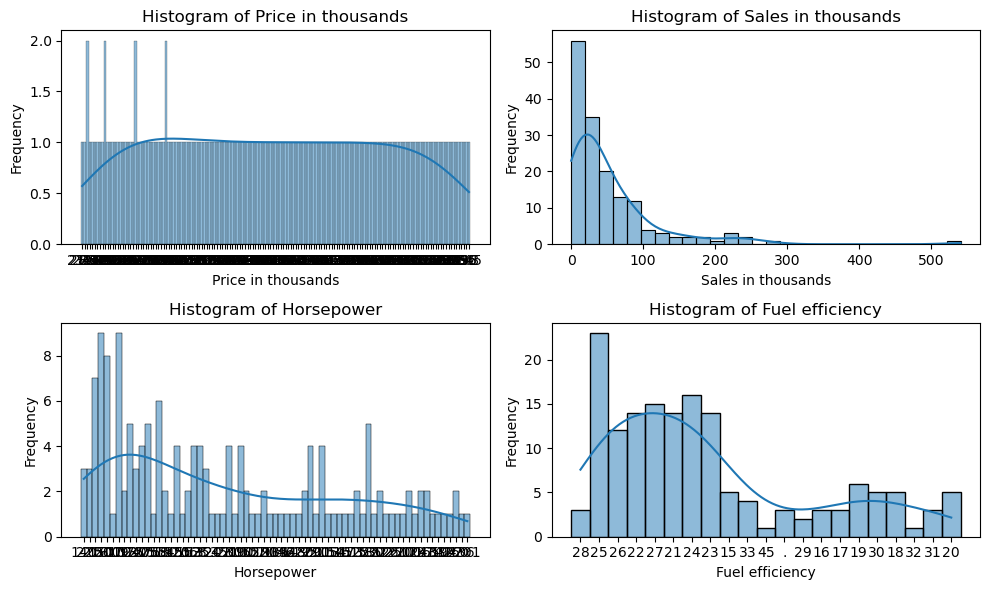

In [ ]:
# Plot Histograms for Multiple Continuous Variables
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("car_sales.csv")

columns = ["Price in thousands", "Sales in thousands", "Horsepower", "Fuel efficiency"]

fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows and 2 columns

for i, column in enumerate(columns):
    # Determine row and column index for the subplot 
    ax = axes[i // 2, i % 2]  
    # Plot histogram 
    sns.histplot(df[column], kde=True, ax=ax)  
    ax.set_title(f"Histogram of {column}")  
    ax.set_xlabel(column)  
    ax.set_ylabel("Frequency")  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show all plots together


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv("car_sales.csv")
columns = ["Price in thousands", "Sales in thousands", "Horsepower", "Fuel efficiency"]

df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
df_cleaned = df.dropna(subset=columns)

scaler = StandardScaler() 
df_standardized = df_cleaned.copy()

df_standardized[columns] = scaler.fit_transform(df_cleaned[columns])

normalizer = MinMaxScaler()

df_normalized = df_cleaned.copy() 

df_normalized[columns] = normalizer.fit_transform(df_cleaned[columns])


print("Standardized Data:") 
print(df_standardized[columns].head()) 

print("\nNormalized Data:") 
print(df_normalized[columns].head())


Standardized Data:
   Price in thousands  Sales in thousands  Horsepower  Fuel efficiency
0           -0.413039           -0.527996   -0.797638         0.974481
1            0.066441           -0.200292    0.695780         0.273405
3            1.011504           -0.649523    0.432235        -0.427672
4           -0.240009           -0.477261   -0.621941         0.740789
5            0.452111           -0.500849    0.256539        -0.427672

Normalized Data:
   Price in thousands  Sales in thousands  Horsepower  Fuel efficiency
0            0.160821            0.031102    0.215190         0.433333
1            0.251295            0.072669    0.430380         0.333333
3            0.429620            0.015687    0.392405         0.233333
4            0.193470            0.037537    0.240506         0.400000
5            0.324067            0.034545    0.367089         0.233333
